## Minist Dataset Classification using different machine learning methods

Haotian Shi (hshi84@wisc.edu)

### Table of Contents
1. Introduction
2. Datasets
3. Investigated Algorithms 
4. Results and Discussion
5. Conclusion 

# 1. Introduction #

# 2. Datasets #

The data processed in this project is MNIST dataset, which is a widely used dataset for classification algorithm from National Institute of Standards and Technology (NIST). The source link is http://yann.lecun.com/exdb/mnist/. The training set consists of handwritten numbers from 250 different people, of which 50% are high school students and 50% are from the Census Bureau staff. The test set is also handwritten digital data in the same proportion. The training data set contains 60,000 samples, and the test data set contains 10,000 samples. Each picture in the MNIST data set consists of 28 x 28 pixels, and each pixel is represented by a gray value. The 28 x 28 pixels are expanded into a one-dimensional row vector with 784 values. These rows are the feature rows in the first array of a image. The second array (labels) contains the corresponding target variable, which is the class label of the handwritten number (integer 0-9). 

Thus, the dimension of the training data ‘X’ is 60000 x 784, where each sample corresponds to a label from numbers 0-9. Similarly, the dimension for the test data ‘X’ is 10000 x 784. The classification problem is defined as: which number from 0 to 9 is most likely to be given a feature vector with 784 features.


# 3. Investigated Algorithms #

## 3.1 K-nearest Neighbor

### 3.1.1 KNN Basic

In [1]:
from mlxtend.data import loadlocal_mnist
import platform
import numpy as np

In [2]:
X_train_o, y_train_o = loadlocal_mnist(images_path='train-images.idx3-ubyte',labels_path='train-labels.idx1-ubyte')
X_test_o, y_test_o = loadlocal_mnist(images_path='t10k-images.idx3-ubyte',labels_path='t10k-labels.idx1-ubyte')


In [3]:
X_train = X_train_o[0:2000]
y_train = y_train_o[0:2000]
X_test = X_test_o[0:400]
y_test = y_test_o[0:400]
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
print(y_train)
y_train.shape

[5 0 4 ... 5 2 0]


(2000,)

In [5]:
# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [131]:
import numpy as np
from collections import Counter

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  

class KNNClassifier(object):
    def __init__(self, k=3):
        """
        The construction method has only one parameter k, the minimum value is 1, and the default is 3.
        """
        assert k >= 1, "k is integer and larger than 0"
        
        self.k = k
        self.X = None
        self.y = None
 
    def fit(self, X, y):
        """
        Training.Assign membership. 
        At the same time, the following two points are required:
         1. The dimensions of X and y must be consistent
         2. k must be less than the number of training samples of X.

        """
        assert X.shape[0] == y.shape[0], "the shape of X and y must be match"
        assert self.k <= X.shape[0], "k must be smaller than shape of X"
        
        self.X = X
        self.y = y
 
    def _calc_euclidean_distance(self, array1, array2):
        """
         Calculate the Euclidean distance between two samples array1 and array2
         array1: the first sample, array type
         array2: The second sample, array type
        
        """
        return np.linalg.norm(array1 - array2)
 
    def _vote(self, topk_y):
        """
        K selected label values, array type
        """
        return Counter(topk_y).most_common()[0][0]
 
    def predict(self, x):
        """
        Prediction, traverse the test samples, for each sample, 
        calculate the distance from all the training samples, 
        and then select the nearest k labels to make a decision
        """
        assert self.X is not None and self.y is not None , "must training before predict"
        assert x.shape[1] == self.X.shape[1]
        
        y_pred = []
        for i in range(len(x)):
            distances = [self._calc_euclidean_distance(x[i], self.X[j]) for j in range(len(self.X))]
            nearest_index = np.argsort(distances)
            topk_index = nearest_index[:self.k]
            y_pred.append(self._vote(self.y[topk_index]))
        return np.array(y_pred)

In [132]:
# Accuracy 
knn = KNNClassifier(10)
knn.fit(X_train_std, y_train)
y_predict = knn.predict(X_test_std)

print("The accuracy of the knn is {}.".format(accuracy_score(y_test, y_predict)))

The accuracy of the knn is 0.8525.


### 3.1.2 KNN Parameter tuning

In [135]:
Knum = []
Acc = []
for i in range(3, 15):
    knn = KNNClassifier(i)
    knn.fit(X_train_std, y_train)
    y_predict = knn.predict(X_test_std)
    print("When K is ",i,", The accuracy of the knn is {}.".format(accuracy_score(y_test, y_predict)))
    Knum.append(i)
    Acc.append(accuracy_score(y_test, y_predict))

When K is  3 , The accuracy of the knn is 0.83.
When K is  4 , The accuracy of the knn is 0.8425.
When K is  5 , The accuracy of the knn is 0.83.
When K is  6 , The accuracy of the knn is 0.835.
When K is  7 , The accuracy of the knn is 0.8425.
When K is  8 , The accuracy of the knn is 0.84.
When K is  9 , The accuracy of the knn is 0.84.
When K is  10 , The accuracy of the knn is 0.8525.
When K is  11 , The accuracy of the knn is 0.835.
When K is  12 , The accuracy of the knn is 0.8275.
When K is  13 , The accuracy of the knn is 0.8225.
When K is  14 , The accuracy of the knn is 0.835.


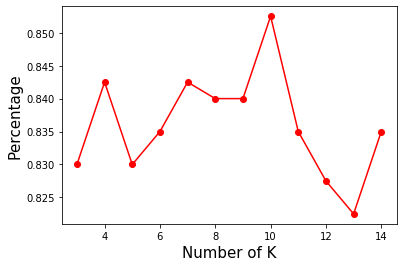

In [136]:
import math
from matplotlib import pyplot as plt
    
plt.plot(Knum, Acc,'ro-',label='Test accuracy')    

plt.xlabel('Number of K',fontsize = 15)
plt.ylabel('Percentage',fontsize = 15)
plt.show()

Thus, the performance of KNN reaches best when number of the nearest neighbors K is 10.

### 3.1.2 KNN Cross-Validation

In [10]:
n_train = len(X_train_std)
k_fold = 8
id_train = [[]] * k_fold
id_val = [[]] * k_fold

for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])
    

In [11]:
CMat_train_best = None
CMat_val_best = None
acc_train_best = 0
acc_val_best = 0
model_best = None

from sklearn.metrics import confusion_matrix
# ConfusionMatrix = np.zeros((2,2), dtype=int)
acc_val_best = 0
for m in range(k_fold):
    print("\n iteration", m)
    X_train_cur = X_train_std[id_train[m]]
    y_train_cur = y_train[id_train[m]]
    X_val_cur = X_train_std[id_val[m]]
    y_val_cur = y_train[id_val[m]]
#     print(X_cur.shape, y_cur.shape, X_val_cur.shape, y_val_cur.shape)
    
#     svc_cur = svm.SVC(kernel='rbf',gamma='auto')
#     svc_cur.fit(X_train_cur, y_train_cur)
    
    knn_cur = KNNClassifier(10)

    knn_cur.fit(X_train_cur, y_train_cur)
    
    y_pred_train_cur = knn_cur.predict(X_train_cur)
    y_pred_val_cur = knn_cur.predict(X_val_cur)
    
    CMat_train = confusion_matrix(y_train_cur, y_pred_train_cur)
#     acc_train = np.sum(np.diag(CMat_train))/np.shape(X_train_cur)[0]
    acc_train = accuracy_score(y_train_cur, y_pred_train_cur)
    
    CMat_val = confusion_matrix(y_val_cur, y_pred_val_cur)
#     acc_val = np.sum(np.diag(CMat_val))/np.shape(X_val_cur)[0]
    acc_val = accuracy_score(y_val_cur, y_pred_val_cur)
    
    if acc_val > acc_val_best:
        acc_train_best = acc_train
        acc_val_best = acc_val
        model_best = knn_cur
        CMat_train_best = CMat_train
        CMat_val_best = CMat_val
    
    print("Training confusion matrix:\n", CMat_train)
    print("Training accuracy:", acc_train)
    print("Validation confusion matrix:\n", CMat_val)
    print("Validation accuracy:", acc_val)


 iteration 0
Training confusion matrix:
 [[159   0   0   0   0   3   1   0   1   0]
 [  0 189   0   1   0   0   0   0   0   0]
 [  3  18 138   3   3   1   1   3   3   1]
 [  1   3   3 156   0   4   0   2   2   6]
 [  0  11   1   1 162   2   1   0   0   9]
 [  1   3   1   5   1 140   2   0   3   3]
 [  6   4   0   0   1   0 167   0   0   0]
 [  0  10   0   1   4   1   0 159   0  18]
 [  0   3   0   2   0  10   1   0 128   4]
 [  2   1   1   1  11   0   0   2   1 161]]
Training accuracy: 0.8908571428571429
Validation confusion matrix:
 [[22  2  0  1  1  0  1  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  1]
 [ 0  5 14  0  0  0  0  5  0  0]
 [ 0  1  0 12  0  1  0  0  0  0]
 [ 1  3  0  0 22  0  0  0  0  1]
 [ 0  0  0  5  1 11  0  1  3  0]
 [ 1  1  0  0  2  1 17  0  0  0]
 [ 0  1  0  0  2  0  0 23  0  5]
 [ 0  5  1  1  0  0  0  0 17  0]
 [ 0  1  1  1  2  0  0  0  2 23]]
Validation accuracy: 0.76

 iteration 1
Training confusion matrix:
 [[159   1   0   0   0   3   2   0   0   0]
 [  0 191   0   1

In [14]:
print("Training confusion matrix:\n", CMat_train)
print("Training accuracy:", acc_train)
print("Validation confusion matrix:\n", CMat_val)
print("Validation accuracy:", acc_val)

Training confusion matrix:
 [[165   1   0   0   0   1   0   0   1   0]
 [  0 190   0   1   0   0   0   0   0   1]
 [  4  18 129   3   6   1   2   8   3   1]
 [  1   3   2 147   0   3   0   1   0   3]
 [  1  11   1   1 166   1   1   1   0  12]
 [  3   2   1   8   1 126   1   0   6   4]
 [  6   3   0   0   2   1 170   0   0   0]
 [  0   9   0   1   5   0   0 166   0  17]
 [  1   7   0   2   0   7   1   0 123   4]
 [  2   1   2   2   8   0   0   0   3 165]]
Training accuracy: 0.884
Validation confusion matrix:
 [[20  0  0  0  0  2  1  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  1  0  0  1  0  0]
 [ 0  0  1 25  0  3  0  0  1  1]
 [ 0  1  0  0 16  2  0  0  0  0]
 [ 0  1  0  0  1 26  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  1  0  0  1  0  0 23  0  1]
 [ 0  0  0  0  0  3  0  0 22  2]
 [ 0  0  0  0  0  0  0  2  0 25]]
Validation accuracy: 0.896


In [12]:
y_predict = model_best.predict(X_test_std)
print("The accuracy of the best knn model after cross-validation is {}.".format(accuracy_score(y_test, y_predict)))

The accuracy of the best knn model after cross-validation is 0.8575.


Although the highest validation accuracy has been imporved to 0.896. The accuracy for the test dataset still remains 0.8575.

##  3.2 Logistic Regression

### 3.2.1 Logistic Regression Basic

In [89]:
def sigmoid(z):
    
    s = 1.0 / (1.0 + np.exp(-z))
    
    return s

In [94]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=200, learning_rate=0.01, print_cost=False):


    # Number of training set samples
    m_train = X_train.shape[1]
    # Number of samples in test set
    m_test = X_test.shape[1]

    # Initialize w and b to 0
    w = np.zeros((X_train.shape[0], 1))
    b = 0

    # record the loss function in real time 
    costs = []
    
    # Perform num_iterations, each iteration calculates a gradient descent
    for i in range(num_iterations):
    
        # find the linear part and activation function
        A = sigmoid(np.dot(w.T, X_train) + b)
        # Calculate loss function
        cost = -1.0 / m_train * np.sum(Y_train * np.log(A) + (1 - Y_train) * np.log(1 - A))  
        cost = np.squeeze(cost)
    
        # Find the gradient
        dw = 1.0 / m_train * np.dot(X_train, (A - Y_train).T)
        db = 1.0 / m_train * np.sum(A - Y_train)
        
        # Gradient descent
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Record the loss
        if i % 10 == 0:
            costs.append(cost)
                
        if print_cost and i % 10 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    w = w.reshape(-1, 1)
    
    # The prediction confidence on the training set predict y_hat
    y_hat_train = sigmoid(np.dot(w.T, X_train) + b)
    
    # The prediction confidence on the test set y_hat
    y_hat_test = sigmoid(np.dot(w.T, X_test) + b)
    
    # Predicted categories on the training set
    y_prediction_train = np.zeros((1, m_train))
    y_prediction_train[y_hat_train > 0.5] = 1
    
    # Predicted categories on the test set
    y_prediction_test = np.zeros((1, m_test))
    y_prediction_test[y_hat_test > 0.5] = 1

    d = {"costs": costs,
         "Y_prediction_test": y_prediction_test,
         "Y_prediction_train": y_prediction_train,
         "Y_hat_test": y_hat_test,
         "Y_hat_train": y_hat_train,
         "w": w,
         "b": b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [101]:
from matplotlib import pyplot as plt

m_train = X_train_std.shape[0]
m_test = X_test_std.shape[0]
# X_train = X_train.T
# X_test = X_test.T
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)
print("train_x shape: " + str(X_train_std.shape))
print("train_y shape: " + str(y_train.shape))
print("test_x shape: " + str(X_test_std.shape))
print("test_y shape: " + str(y_test.shape))

y_hat_test = []
y_hat_train = []

# Decompose into 10 binary classification tasks
for i in range(10):
    y_tr = np.zeros(y_train.shape)
    y_te = np.zeros(y_test.shape)
    y_tr[y_train == i] = 1
    y_te[y_test == i] = 1
    d = model(X_train.T, y_tr, X_test.T, y_te, num_iterations=200, learning_rate=0.5, print_cost=False)
    y_hat_test.append(d["Y_hat_test"])
    y_hat_train.append(d["Y_hat_train"])

    # Print train/test Errors
    print(str(i) + "th classifier train accuracy: {} %".format(100 - np.mean(np.abs(d["Y_prediction_train"] - y_tr)) * 100))
    print(str(i) + "th classifier test accuracy: {} %".format(100 - np.mean(np.abs(d["Y_prediction_test"] - y_te)) * 100))

y_hat_test = np.array(y_hat_test)
y_hat_train = np.array(y_hat_train)

# y_hat_test stores the confidence of each example in the positive class of ten classifiers
# For each example, select the category with the highest confidence, which is the category the example belongs to
y_pred_test = np.argmax(y_hat_test, axis=0)
y_pred_train = np.argmax(y_hat_train, axis=0)

score_train = 1.0 * np.sum(y_pred_train == y_train) / m_train
score_test = 1.0 * np.sum(y_pred_test == y_test) / m_test

print(np.sum(y_pred_train == y_train), m_train)
print(np.sum(y_pred_test == y_test), m_test)

print("Training accuracy: " + str(score_train))
print("Testing accuracy: " + str(score_test))

train_x shape: (2000, 784)
train_y shape: (1, 2000)
test_x shape: (400, 784)
test_y shape: (1, 400)


D:\SoftwareFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
D:\SoftwareFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


0th classifier train accuracy: 99.95 %
0th classifier test accuracy: 98.5 %
1th classifier train accuracy: 99.35 %
1th classifier test accuracy: 98.75 %
2th classifier train accuracy: 99.2 %
2th classifier test accuracy: 96.5 %
3th classifier train accuracy: 84.8 %
3th classifier test accuracy: 75.5 %
4th classifier train accuracy: 98.5 %
4th classifier test accuracy: 96.25 %
5th classifier train accuracy: 98.75 %
5th classifier test accuracy: 95.5 %
6th classifier train accuracy: 100.0 %
6th classifier test accuracy: 96.75 %
7th classifier train accuracy: 99.65 %
7th classifier test accuracy: 96.75 %
8th classifier train accuracy: 85.55 %
8th classifier test accuracy: 82.5 %
9th classifier train accuracy: 94.25 %
9th classifier test accuracy: 92.0 %
1696 2000
282 400
Training accuracy: 0.848
Testing accuracy: 0.705


### 3.2.2 Logistic Regression Parameter tuning

### Learning rate

Firstly, I will do the experiment to explore the impact of learning rate for the performance of logistic regression.

In [111]:
LearningRate = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.8]

In [114]:

testing_accuracy = []
training_accuracy = []

for l in range(len(LearningRate)):
    y_hat_test = []
    y_hat_train = []
    
    print("Learning rate is: ", LearningRate[l])
    for i in range(10):
        y_tr = np.zeros(y_train.shape)
        y_te = np.zeros(y_test.shape)
        y_tr[y_train == i] = 1
        y_te[y_test == i] = 1
        d = model(X_train.T, y_tr, X_test.T, y_te, num_iterations=200, learning_rate=LearningRate[l], print_cost=False)
        y_hat_test.append(d["Y_hat_test"])
        y_hat_train.append(d["Y_hat_train"])

        # Print train/test Errors

        print(str(i) + "th classifier train accuracy: {} %".format(100 - np.mean(np.abs(d["Y_prediction_train"] - y_tr)) * 100))
        print(str(i) + "th classifier test accuracy: {} %".format(100 - np.mean(np.abs(d["Y_prediction_test"] - y_te)) * 100))

    y_hat_test = np.array(y_hat_test)
    y_hat_train = np.array(y_hat_train)

    # y_hat_test stores the confidence of each example in the positive class of ten classifiers
    # For each example, select the category with the highest confidence, which is the category the example belongs to
    y_pred_test = np.argmax(y_hat_test, axis=0)
    y_pred_train = np.argmax(y_hat_train, axis=0)

    score_train = 1.0 * np.sum(y_pred_train == y_train) / m_train
    score_test = 1.0 * np.sum(y_pred_test == y_test) / m_test

    print(np.sum(y_pred_train == y_train), m_train)
    print(np.sum(y_pred_test == y_test), m_test)

    print("When learning rate is: ", LearningRate[l], ",the training accuracy is: " + str(score_train))
    print("When learning rate is: ", LearningRate[l], ",the testing accuracy is: " + str(score_test))
    testing_accuracy.append(score_test)
    training_accuracy.append(score_train)
    # Decompose into 10 binary classification tasks


Learning rate is:  1e-06
0th classifier train accuracy: 98.4 %
0th classifier test accuracy: 98.5 %
1th classifier train accuracy: 98.5 %
1th classifier test accuracy: 97.75 %
2th classifier train accuracy: 95.8 %
2th classifier test accuracy: 95.25 %
3th classifier train accuracy: 96.15 %
3th classifier test accuracy: 95.25 %
4th classifier train accuracy: 96.55 %
4th classifier test accuracy: 95.75 %
5th classifier train accuracy: 93.9 %
5th classifier test accuracy: 92.5 %
6th classifier train accuracy: 97.85 %
6th classifier test accuracy: 97.0 %
7th classifier train accuracy: 97.15 %
7th classifier test accuracy: 95.25 %
8th classifier train accuracy: 94.65 %
8th classifier test accuracy: 94.25 %
9th classifier train accuracy: 94.35 %
9th classifier test accuracy: 93.0 %
1741 2000
332 400
When learning rate is:  1e-06 ,the training accuracy is: 0.8705
When learning rate is:  1e-06 ,the testing accuracy is: 0.83
Learning rate is:  1e-05
0th classifier train accuracy: 99.5 %
0th cla

D:\SoftwareFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
D:\SoftwareFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


0th classifier train accuracy: 99.9 %
0th classifier test accuracy: 99.5 %
1th classifier train accuracy: 99.7 %
1th classifier test accuracy: 99.0 %
2th classifier train accuracy: 99.1 %
2th classifier test accuracy: 96.75 %
3th classifier train accuracy: 98.75 %
3th classifier test accuracy: 95.0 %
4th classifier train accuracy: 99.3 %
4th classifier test accuracy: 97.25 %
5th classifier train accuracy: 97.9 %
5th classifier test accuracy: 95.0 %
6th classifier train accuracy: 100.0 %
6th classifier test accuracy: 97.5 %
7th classifier train accuracy: 99.6 %
7th classifier test accuracy: 96.5 %
8th classifier train accuracy: 92.1 %
8th classifier test accuracy: 93.5 %
9th classifier train accuracy: 97.25 %
9th classifier test accuracy: 95.0 %
1813 2000
333 400
When learning rate is:  0.0001 ,the training accuracy is: 0.9065
When learning rate is:  0.0001 ,the testing accuracy is: 0.8325
Learning rate is:  0.001
0th classifier train accuracy: 99.95 %
0th classifier test accuracy: 98.7

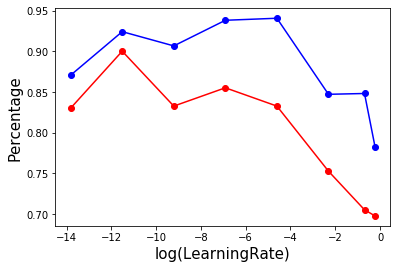

In [120]:
import math
LearningRate_log = []
for i in range(len(LearningRate)):
    LearningRate_log.append(math.log(LearningRate[i]))
    
plt.plot(LearningRate_log, testing_accuracy,'ro-',label='Test accuracy')    
plt.plot(LearningRate_log, training_accuracy,'bo-',label='Training accuracy')    


plt.xlabel('log(LearningRate)',fontsize = 15)
plt.ylabel('Percentage',fontsize = 15)
plt.show()

Thus, the best learning rate for training is 0.00001, which leads to the highest testing accuracy. 

### number of iterations for gradient descent

Next, I will do the experiment to explore the impact of number of iterations for gradient descnet on the training performance.

In [121]:
number_of_iterations = [10, 100, 200, 500, 1000, 2000]

In [123]:
testing_accuracy = []
training_accuracy = []

for l in range(len(number_of_iterations)):
    y_hat_test = []
    y_hat_train = []
    
    print("The number of iterations is: ", number_of_iterations[l])
    for i in range(10):
        y_tr = np.zeros(y_train.shape)
        y_te = np.zeros(y_test.shape)
        y_tr[y_train == i] = 1
        y_te[y_test == i] = 1
        d = model(X_train.T, y_tr, X_test.T, y_te, num_iterations=number_of_iterations[l], learning_rate=0.00001, print_cost=False)
        y_hat_test.append(d["Y_hat_test"])
        y_hat_train.append(d["Y_hat_train"])

        # Print train/test Errors

        print(str(i) + "th classifier train accuracy: {} %".format(100 - np.mean(np.abs(d["Y_prediction_train"] - y_tr)) * 100))
        print(str(i) + "th classifier test accuracy: {} %".format(100 - np.mean(np.abs(d["Y_prediction_test"] - y_te)) * 100))

    y_hat_test = np.array(y_hat_test)
    y_hat_train = np.array(y_hat_train)

    # y_hat_test stores the confidence of each example in the positive class of ten classifiers
    # For each example, select the category with the highest confidence, which is the category the example belongs to
    y_pred_test = np.argmax(y_hat_test, axis=0)
    y_pred_train = np.argmax(y_hat_train, axis=0)

    score_train = 1.0 * np.sum(y_pred_train == y_train) / m_train
    score_test = 1.0 * np.sum(y_pred_test == y_test) / m_test

    print(np.sum(y_pred_train == y_train), m_train)
    print(np.sum(y_pred_test == y_test), m_test)

    print("When the number of interations is: ", number_of_iterations[l], ",the training accuracy is: " + str(score_train))
    print("When the number of interations is: ", number_of_iterations[l], ",the testing accuracy is: " + str(score_test))
    testing_accuracy.append(score_test)
    training_accuracy.append(score_train)
    # Decompose into 10 binary classification tasks

The number of iterations is:  10
0th classifier train accuracy: 97.75 %
0th classifier test accuracy: 98.25 %
1th classifier train accuracy: 97.95 %
1th classifier test accuracy: 97.25 %
2th classifier train accuracy: 94.35 %
2th classifier test accuracy: 94.25 %
3th classifier train accuracy: 95.5 %
3th classifier test accuracy: 94.5 %
4th classifier train accuracy: 95.95 %
4th classifier test accuracy: 95.25 %
5th classifier train accuracy: 92.05 %
5th classifier test accuracy: 90.5 %
6th classifier train accuracy: 97.65 %
6th classifier test accuracy: 96.25 %
7th classifier train accuracy: 96.85 %
7th classifier test accuracy: 95.0 %
8th classifier train accuracy: 93.3 %
8th classifier test accuracy: 93.75 %
9th classifier train accuracy: 93.25 %
9th classifier test accuracy: 91.5 %
1693 2000
322 400
When the number of interations is:  10 ,the training accuracy is: 0.8465
When the number of interations is:  10 ,the testing accuracy is: 0.805
The number of iterations is:  100
0th cla

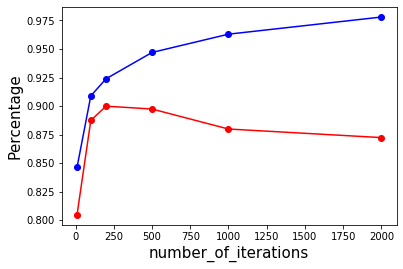

In [124]:
import math

plt.plot(number_of_iterations, testing_accuracy,'ro-',label='Test accuracy')    
plt.plot(number_of_iterations, training_accuracy,'bo-',label='Training accuracy')    

plt.xlabel('number_of_iterations',fontsize = 15)
plt.ylabel('Percentage',fontsize = 15)
plt.show()

The training accuracy increases as number of iterations increase. However, as the number of iterations increase, the testing accuracy reaches the peak at first, and then decreases. This is because too many iterations can lead the overfitting problem, which reduce the generalization capability of the model.

## 3.3 SVM

### 3.3.1 SVM Basic

In [46]:
from sklearn import svm

In [57]:
svc = svm.SVC()
svc.fit(X_train_std, y_train)

D:\SoftwareFiles\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [58]:
svc_train = svc.score(X_train_std, y_train)
print("The accuracy of the SVM is for training dataset is: ", svc_train)
svc_test = svc.score(X_test_std, y_test)
print("The accuracy of the SVM is for testing dataset is: ",svc_test)

The accuracy of the SVM is for training dataset is:  0.9775
The accuracy of the SVM is for testing dataset is:  0.9


### 3.3.2 SVM Parameter Tuning

### Knernal

### kernel=linear

In [59]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [60]:
svc_train = linear_svc.score(X_train_std, y_train)
print("The accuracy of the SVM (linear kernel) is for training dataset is: ", svc_train)
svc_test = linear_svc.score(X_test_std, y_test)
print("The accuracy of the SVM (linear kernel) is for testing dataset is: ",svc_test)

The accuracy of the SVM (linear kernel) is for training dataset is:  1.0
The accuracy of the SVM (linear kernel) is for testing dataset is:  0.8975


### kernel=poly

In [62]:
poly_svc = svm.SVC(kernel='poly')
poly_svc.fit(X_train_std, y_train)


D:\SoftwareFiles\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [63]:
svc_train = poly_svc.score(X_train_std, y_train)
print("The accuracy of the SVM (poly kernel) is for training dataset is: ", svc_train)
svc_test = poly_svc.score(X_test_std, y_test)
print("The accuracy of the SVM (poly kernel) is for testing dataset is: ",svc_test)

The accuracy of the SVM (poly kernel) is for training dataset is:  0.7575
The accuracy of the SVM (poly kernel) is for testing dataset is:  0.5225


### kernel=rbf

In [64]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train_std, y_train)

D:\SoftwareFiles\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
svc_train = rbf_svc.score(X_train_std, y_train)
print("The accuracy of the SVM (rbf kernel) is for training dataset is: ", svc_train)
svc_test = rbf_svc.score(X_test_std, y_test)
print("The accuracy of the SVM (rbf kernel) is for testing dataset is: ",svc_test)

The accuracy of the SVM (rbf kernel) is for training dataset is:  0.9775
The accuracy of the SVM (rbf kernel) is for testing dataset is:  0.9


### kernel=sigmoid

In [73]:
sigmoid_svc = svm.SVC(kernel='sigmoid')
sigmoid_svc.fit(X_train_std, y_train)

D:\SoftwareFiles\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [74]:
svc_train = sigmoid_svc.score(X_train_std, y_train)
print("The accuracy of the SVM (sigmoid kernel) is for training dataset is: ", svc_train)
svc_test = sigmoid_svc.score(X_test_std, y_test)
print("The accuracy of the SVM (sigmoid kernel) is for testing dataset is: ",svc_test)

The accuracy of the SVM (sigmoid kernel) is for training dataset is:  0.9265
The accuracy of the SVM (sigmoid kernel) is for testing dataset is:  0.89


After comparing the kernel category, rbf achieve the best performance.

### Gamma

In [68]:
rbf_svc = svm.SVC(kernel='rbf',gamma = 'auto')
rbf_svc.fit(X_train_std, y_train)
svc_train = rbf_svc.score(X_train_std, y_train)
print("The accuracy of the SVM (rbf kernel) is for training dataset is: ", svc_train)
svc_test = rbf_svc.score(X_test_std, y_test)
print("The accuracy of the SVM (rbf kernel) is for testing dataset is: ",svc_test)

The accuracy of the SVM (rbf kernel) is for training dataset is:  0.9775
The accuracy of the SVM (rbf kernel) is for testing dataset is:  0.9


The gamma will not impact the performance of the rbf SVM classifier.

### 3.3.3 SVM Cross-Validation

In [77]:
from sklearn.metrics import accuracy_score
n_train = len(X_train_std)
k_fold = 8
id_train = [[]] * k_fold
id_val = [[]] * k_fold

for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [79]:
CMat_train_best = None
CMat_val_best = None
acc_train_best = 0
acc_val_best = 0
model_best = None

from sklearn.metrics import confusion_matrix
# ConfusionMatrix = np.zeros((2,2), dtype=int)
acc_val_best = 0
for m in range(k_fold):
    print("\n iteration", m)
    X_train_cur = X_train_std[id_train[m]]
    y_train_cur = y_train[id_train[m]]
    X_val_cur = X_train_std[id_val[m]]
    y_val_cur = y_train[id_val[m]]
#     print(X_cur.shape, y_cur.shape, X_val_cur.shape, y_val_cur.shape)
    
#     svc_cur = svm.SVC(kernel='rbf',gamma='auto')
#     svc_cur.fit(X_train_cur, y_train_cur)
    
    rbf_svc = svm.SVC(kernel='rbf')
    rbf_svc.fit(X_train_std, y_train)
    
    y_pred_train_cur = rbf_svc.predict(X_train_cur)
    y_pred_val_cur = rbf_svc.predict(X_val_cur)
    
    CMat_train = confusion_matrix(y_train_cur, y_pred_train_cur)
#     acc_train = np.sum(np.diag(CMat_train))/np.shape(X_train_cur)[0]
    acc_train = accuracy_score(y_train_cur, y_pred_train_cur)
    
    CMat_val = confusion_matrix(y_val_cur, y_pred_val_cur)
#     acc_val = np.sum(np.diag(CMat_val))/np.shape(X_val_cur)[0]
    acc_val = accuracy_score(y_val_cur, y_pred_val_cur)
    
    if acc_val > acc_val_best:
        acc_train_best = acc_train
        acc_val_best = acc_val
        model_best = rbf_svc
        CMat_train_best = CMat_train
        CMat_val_best = CMat_val
    
    print("Training confusion matrix:\n", CMat_train)
    print("Training accuracy:", acc_train)
    print("Validation confusion matrix:\n", CMat_val)
    print("Validation accuracy:", acc_val)


 iteration 0


D:\SoftwareFiles\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training confusion matrix:
 [[164   0   0   0   0   0   0   0   0   0]
 [  0 188   1   1   0   0   0   0   0   0]
 [  0   0 171   0   1   0   0   0   1   1]
 [  0   0   0 173   0   1   0   1   1   1]
 [  0   1   0   0 183   0   1   0   0   2]
 [  0   1   1   0   1 154   2   0   0   0]
 [  0   0   0   0   0   1 177   0   0   0]
 [  0   1   0   0   1   0   0 188   0   3]
 [  0   0   0   0   0   2   1   0 145   0]
 [  2   0   0   1   1   1   0   1   0 174]]
Training accuracy: 0.9811428571428571
Validation confusion matrix:
 [[26  0  0  0  0  0  1  0  0  0]
 [ 0 29  0  0  0  0  0  1  0  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  1  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0]
 [ 0  0  0  1  0 20  0  0  0  0]
 [ 0  0  0  0  0  1 21  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  1]
 [ 0  1  1  0  0  0  0  0 22  0]
 [ 1  0  0  1  0  1  0  1  0 26]]
Validation accuracy: 0.952

 iteration 1


D:\SoftwareFiles\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training confusion matrix:
 [[164   0   0   0   0   0   1   0   0   0]
 [  0 190   1   1   0   0   0   1   0   0]
 [  0   0 174   0   1   0   0   0   1   1]
 [  0   0   0 164   0   2   0   1   0   1]
 [  0   1   0   0 185   0   1   0   0   2]
 [  0   1   1   1   1 152   2   0   0   0]
 [  0   0   0   0   0   2 170   0   0   0]
 [  0   1   0   0   1   0   0 193   0   4]
 [  0   1   1   0   0   2   1   0 136   0]
 [  3   0   0   2   1   2   0   2   0 178]]
Training accuracy: 0.9748571428571429
Validation confusion matrix:
 [[26  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  1  0]
 [ 0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0 22]]
Validation accuracy: 0.996

 iteration 2


D:\SoftwareFiles\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training confusion matrix:
 [[174   0   0   0   0   0   1   0   0   0]
 [  0 200   1   1   0   0   0   1   0   0]
 [  0   0 172   0   1   0   0   0   0   1]
 [  0   0   0 159   0   1   0   1   1   1]
 [  0   1   0   0 181   0   0   0   0   2]
 [  0   1   1   1   0 150   2   0   0   0]
 [  0   0   0   0   0   2 164   0   0   0]
 [  0   1   0   0   1   0   0 186   0   4]
 [  0   1   1   0   0   1   1   0 155   0]
 [  2   0   0   2   0   1   0   1   0 173]]
Training accuracy: 0.9794285714285714
Validation confusion matrix:
 [[16  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  1  0]
 [ 0  0  0 27  0  1  0  0  0  0]
 [ 0  0  0  0 29  0  1  0  0  0]
 [ 0  0  0  0  1 24  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  0  0  0  0  1  0  0 12  0]
 [ 1  0  0  0  1  1  0  1  0 27]]
Validation accuracy: 0.964

 iteration 3


D:\SoftwareFiles\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training confusion matrix:
 [[164   0   0   0   0   0   1   0   0   0]
 [  0 182   1   1   0   0   0   1   0   0]
 [  0   0 172   0   1   0   0   0   1   1]
 [  0   0   0 161   0   2   0   1   1   1]
 [  0   1   0   0 187   0   1   0   0   2]
 [  0   1   0   1   1 154   2   0   0   0]
 [  0   0   0   0   0   2 177   0   0   0]
 [  0   1   0   0   0   0   0 183   0   4]
 [  0   1   1   0   0   2   1   0 154   0]
 [  3   0   0   2   1   2   0   2   0 173]]
Training accuracy: 0.9754285714285714
Validation confusion matrix:
 [[26  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0]
 [ 0  0  1  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  1  0  0 35  0  0]
 [ 0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0 27]]
Validation accuracy: 0.992

 iteration 4


D:\SoftwareFiles\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training confusion matrix:
 [[169   0   0   0   0   0   1   0   0   0]
 [  0 193   1   1   0   0   0   1   0   0]
 [  0   0 168   0   1   0   0   0   1   1]
 [  0   0   0 166   0   2   0   0   1   0]
 [  0   1   0   0 179   0   1   0   0   1]
 [  0   0   1   1   1 147   2   0   0   0]
 [  0   0   0   0   0   2 181   0   0   0]
 [  0   0   0   0   1   0   0 196   0   1]
 [  0   1   1   0   0   1   0   0 148   0]
 [  3   0   0   1   1   2   0   2   0 169]]
Training accuracy: 0.9805714285714285
Validation confusion matrix:
 [[21  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  1  0  1]
 [ 0  0  0  0 31  0  0  0  0  1]
 [ 0  1  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  1  0  0  0  0  0 22  0  3]
 [ 0  0  0  0  0  1  1  0 19  0]
 [ 0  0  0  1  0  0  0  0  0 31]]
Validation accuracy: 0.956

 iteration 5


D:\SoftwareFiles\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training confusion matrix:
 [[161   0   0   0   0   0   1   0   0   0]
 [  0 192   1   1   0   0   0   1   0   0]
 [  0   0 169   0   0   0   0   0   1   1]
 [  0   0   0 156   0   2   0   1   1   1]
 [  0   1   0   0 179   0   1   0   0   1]
 [  0   1   1   1   1 157   2   0   0   0]
 [  0   0   0   0   0   2 172   0   0   0]
 [  0   1   0   0   1   0   0 198   0   4]
 [  0   1   1   0   0   2   1   0 142   0]
 [  3   0   0   2   1   2   0   2   0 181]]
Training accuracy: 0.9754285714285714
Validation confusion matrix:
 [[29  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  1  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  1]
 [ 0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0  0  0 19]]
Validation accuracy: 0.992

 iteration 6


D:\SoftwareFiles\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training confusion matrix:
 [[167   0   0   0   0   0   1   0   0   0]
 [  0 185   0   0   0   0   0   1   0   0]
 [  0   0 167   0   1   0   0   0   1   0]
 [  0   0   0 168   0   2   0   1   1   1]
 [  0   1   0   0 184   0   1   0   0   2]
 [  0   1   1   1   1 158   0   0   0   0]
 [  0   0   0   0   0   1 165   0   0   0]
 [  0   1   0   0   1   0   0 190   0   4]
 [  0   1   1   0   0   2   1   0 149   0]
 [  2   0   0   2   1   2   0   2   0 179]]
Training accuracy: 0.9782857142857143
Validation confusion matrix:
 [[23  0  0  0  0  0  0  0  0  0]
 [ 0 32  1  1  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  1]
 [ 0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0]
 [ 0  0  0  0  0 16  2  0  0  0]
 [ 0  0  0  0  0  1 33  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0 18  0]
 [ 1  0  0  0  0  0  0  0  0 21]]
Validation accuracy: 0.972

 iteration 7


D:\SoftwareFiles\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training confusion matrix:
 [[167   0   0   0   0   0   1   0   0   0]
 [  0 189   1   1   0   0   0   1   0   0]
 [  0   0 172   0   1   0   0   0   1   1]
 [  0   0   0 155   0   2   0   1   1   1]
 [  0   0   0   0 192   0   1   0   0   2]
 [  0   1   1   1   1 146   2   0   0   0]
 [  0   0   0   0   0   2 180   0   0   0]
 [  0   1   0   0   1   0   0 192   0   4]
 [  0   1   1   0   0   2   1   0 140   0]
 [  3   0   0   2   1   2   0   2   0 173]]
Training accuracy: 0.9748571428571429
Validation confusion matrix:
 [[23  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0]
 [ 0  1  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0 27]]
Validation accuracy: 0.996


In [80]:
print("Training confusion matrix:\n", CMat_train)
print("Training accuracy:", acc_train)
print("Validation confusion matrix:\n", CMat_val)
print("Validation accuracy:", acc_val)

Training confusion matrix:
 [[167   0   0   0   0   0   1   0   0   0]
 [  0 189   1   1   0   0   0   1   0   0]
 [  0   0 172   0   1   0   0   0   1   1]
 [  0   0   0 155   0   2   0   1   1   1]
 [  0   0   0   0 192   0   1   0   0   2]
 [  0   1   1   1   1 146   2   0   0   0]
 [  0   0   0   0   0   2 180   0   0   0]
 [  0   1   0   0   1   0   0 192   0   4]
 [  0   1   1   0   0   2   1   0 140   0]
 [  3   0   0   2   1   2   0   2   0 173]]
Training accuracy: 0.9748571428571429
Validation confusion matrix:
 [[23  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0]
 [ 0  1  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0 27]]
Validation accuracy: 0.996


In [81]:
y_predict = model_best.predict(X_test_std)
print("The accuracy of the best SVM model after cross-validation is {}.".format(accuracy_score(y_test, y_predict)))

The accuracy of the best SVM model after cross-validation is 0.9.


Although the highest validation accuracy has been imporved to 0.996. The accuracy for the test dataset still remains 0.9.

## 3.4 Neuron networks

### 3.4.1 Neuron networks basic

In [11]:
from sklearn.neural_network import MLPClassifier


In [12]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10,10), random_state=1)
clf.fit(X_train_std, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
clf_train = clf.score(X_train_std, y_train)
print("The accuracy of the neuron networks for training dataset is: ", clf_train)
clf_test = clf.score(X_test_std, y_test)
print("The accuracy of the neuron networks for testing dataset is: ",clf_test)

The accuracy of the neuron networks for training dataset is:  0.9995
The accuracy of the neuron networks for testing dataset is:  0.8275


### 3.4.2 Neuron networks parameter tuning¶

### Solver

### sgd

In [14]:
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(10,10,10), random_state=1)
clf.fit(X_train_std, y_train)
clf_train = clf.score(X_train_std, y_train)
print("The accuracy of the sgd neuron networks for training dataset is: ", clf_train)
clf_test = clf.score(X_test_std, y_test)
print("The accuracy of the sgd neuron networks for testing dataset is: ",clf_test)

The accuracy of the sgd neuron networks for training dataset is:  0.952
The accuracy of the sgd neuron networks for testing dataset is:  0.7675


D:\SoftwareFiles\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### adam

In [15]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,10,10), random_state=1)
clf.fit(X_train_std, y_train)
clf_train = clf.score(X_train_std, y_train)
print("The accuracy of the adam neuron networks for training dataset is: ", clf_train)
clf_test = clf.score(X_test_std, y_test)
print("The accuracy of the adam neuron networks for testing dataset is: ",clf_test)

The accuracy of the adam neuron networks for training dataset is:  0.999
The accuracy of the adam neuron networks for testing dataset is:  0.825


### lbfgs

In [102]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10,10), random_state=1)
clf.fit(X_train_std, y_train)
clf_train = clf.score(X_train_std, y_train)
print("The accuracy of the neuron networks for training dataset is: ", clf_train)
clf_test = clf.score(X_test_std, y_test)
print("The accuracy of the neuron networks for testing dataset is: ",clf_test)

The accuracy of the neuron networks for training dataset is:  0.9995
The accuracy of the neuron networks for testing dataset is:  0.8275


Lbgs solver achieves the best performance.

### Activation function

In [110]:
clf = MLPClassifier(activation = 'logistic',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10,10), random_state=1)

clf.fit(X_train_std, y_train)
clf_train = clf.score(X_train_std, y_train)
print("The accuracy of the logistic function neuron networks for training dataset is: ", clf_train)
clf_test = clf.score(X_test_std, y_test)
print("The accuracy of the logistic function neuron networks for testing dataset is: ",clf_test)

The accuracy of the logistic function neuron networks for training dataset is:  0.9295
The accuracy of the logistic function neuron networks for testing dataset is:  0.78


In [111]:
clf = MLPClassifier(activation = 'tanh',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10,10), random_state=1)

clf.fit(X_train_std, y_train)
clf_train = clf.score(X_train_std, y_train)
print("The accuracy of the tanh function neuron networks for training dataset is: ", clf_train)
clf_test = clf.score(X_test_std, y_test)
print("The accuracy of the tanh function neuron networks for testing dataset is: ",clf_test)

The accuracy of the tanh function neuron networks for training dataset is:  0.9885
The accuracy of the tanh function neuron networks for testing dataset is:  0.75


In [112]:
clf = MLPClassifier(activation = 'identity',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10,10), random_state=1)

clf.fit(X_train_std, y_train)
clf_train = clf.score(X_train_std, y_train)
print("The accuracy of the identity function neuron networks for training dataset is: ", clf_train)
clf_test = clf.score(X_test_std, y_test)
print("The accuracy of the identity function neuron networks for testing dataset is: ",clf_test)

The accuracy of the identity function neuron networks for training dataset is:  1.0
The accuracy of the identity function neuron networks for testing dataset is:  0.845


Identity activation function achieves best performance.

### learning rate

In [113]:
LearningRate = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]

In [114]:
testing_accuracy = []
training_accuracy = []

for i in range(len(LearningRate)):
    clf = MLPClassifier(activation='identity', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=LearningRate[i], max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
    
    clf.fit(X_train_std, y_train)

    clf_test = clf.score(X_test_std, y_test)
    print('When learning rate is: ', LearningRate[i], "The accuracy of the neuron networks for testing dataset is: ",clf_test)
    

When learning rate is:  1e-06 The accuracy of the neuron networks for testing dataset is:  0.845
When learning rate is:  1e-05 The accuracy of the neuron networks for testing dataset is:  0.845
When learning rate is:  0.0001 The accuracy of the neuron networks for testing dataset is:  0.845
When learning rate is:  0.001 The accuracy of the neuron networks for testing dataset is:  0.845
When learning rate is:  0.01 The accuracy of the neuron networks for testing dataset is:  0.845
When learning rate is:  0.1 The accuracy of the neuron networks for testing dataset is:  0.845


learning rate has little impact on the training.

### Hidden layer neuron size

In [121]:
hiddensize = [5, 10, 50, 100, 200, 500]

In [133]:
testing_accuracy = []
training_accuracy = []

for i in range(len(hiddensize)):
    clf = MLPClassifier(activation='identity', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(hiddensize[i], hiddensize[i], hiddensize[i]), learning_rate='constant',
              learning_rate_init=1e-05, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
    
    clf.fit(X_train_std, y_train)

    clf_train = clf.score(X_train_std, y_train)
    clf_test = clf.score(X_test_std, y_test)
    
    training_accuracy.append(clf_train)
    testing_accuracy.append(clf_test)
    
    print('When each hiddenlayer size is: ', hiddensize[i], "The accuracy of the neuron networks for training dataset is: ",clf_train)
    print('When each hideenlayer size is: ', hiddensize[i], "The accuracy of the neuron networks for testing dataset is: ",clf_test)

When each hiddenlayer size is:  5 The accuracy of the neuron networks for training dataset is:  1.0
When each hideenlayer size is:  5 The accuracy of the neuron networks for testing dataset is:  0.8025
When each hiddenlayer size is:  10 The accuracy of the neuron networks for training dataset is:  1.0
When each hideenlayer size is:  10 The accuracy of the neuron networks for testing dataset is:  0.845
When each hiddenlayer size is:  50 The accuracy of the neuron networks for training dataset is:  1.0
When each hideenlayer size is:  50 The accuracy of the neuron networks for testing dataset is:  0.86
When each hiddenlayer size is:  100 The accuracy of the neuron networks for training dataset is:  1.0
When each hideenlayer size is:  100 The accuracy of the neuron networks for testing dataset is:  0.8725
When each hiddenlayer size is:  200 The accuracy of the neuron networks for training dataset is:  1.0
When each hideenlayer size is:  200 The accuracy of the neuron networks for testing d

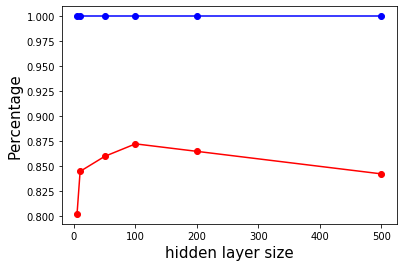

In [134]:
import math
from matplotlib import pyplot as plt


plt.plot(hiddensize, testing_accuracy,'ro-',label='Test accuracy')    
plt.plot(hiddensize, training_accuracy,'bo-',label='Training accuracy')    

plt.xlabel('hidden layer size',fontsize = 15)
plt.ylabel('Percentage',fontsize = 15)
plt.show()

### Iterations

In [135]:
Iterations = [10, 100, 1000, 2000, 5000]

In [137]:
testing_accuracy = []
training_accuracy = []

for i in range(len(Iterations)):
    clf = MLPClassifier(activation='identity', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=1e-05, max_iter=Iterations[i], momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
    
    clf.fit(X_train_std, y_train)

    clf_train = clf.score(X_train_std, y_train)
    clf_test = clf.score(X_test_std, y_test)
    
    training_accuracy.append(clf_train)
    testing_accuracy.append(clf_test)
    
    print('When max iteration is: ', Iterations[i], "The accuracy of the neuron networks for training dataset is: ",clf_train)
    print('When max iteration is: ', Iterations[i], "The accuracy of the neuron networks for testing dataset is: ",clf_test)

When max iteration is:  10 The accuracy of the neuron networks for training dataset is:  0.962
When max iteration is:  10 The accuracy of the neuron networks for testing dataset is:  0.86
When max iteration is:  100 The accuracy of the neuron networks for training dataset is:  1.0
When max iteration is:  100 The accuracy of the neuron networks for testing dataset is:  0.8725
When max iteration is:  1000 The accuracy of the neuron networks for training dataset is:  1.0
When max iteration is:  1000 The accuracy of the neuron networks for testing dataset is:  0.8725
When max iteration is:  2000 The accuracy of the neuron networks for training dataset is:  1.0
When max iteration is:  2000 The accuracy of the neuron networks for testing dataset is:  0.8725
When max iteration is:  5000 The accuracy of the neuron networks for training dataset is:  1.0
When max iteration is:  5000 The accuracy of the neuron networks for testing dataset is:  0.8725


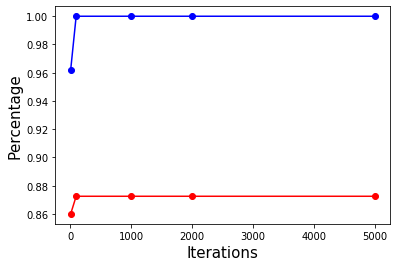

In [138]:
import math
from matplotlib import pyplot as plt


plt.plot(Iterations, testing_accuracy,'ro-',label='Test accuracy')    
plt.plot(Iterations, training_accuracy,'bo-',label='Training accuracy')    

plt.xlabel('Iterations',fontsize = 15)
plt.ylabel('Percentage',fontsize = 15)
plt.show()

### 3.4.2 Cross-Validation for neuron networks

In [16]:
from sklearn.metrics import accuracy_score
n_train = len(X_train_std)
k_fold = 8
id_train = [[]] * k_fold
id_val = [[]] * k_fold

for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [18]:
CMat_train_best = None
CMat_val_best = None
acc_train_best = 0
acc_val_best = 0
model_best = None

from sklearn.metrics import confusion_matrix
# ConfusionMatrix = np.zeros((2,2), dtype=int)
acc_val_best = 0
for m in range(k_fold):
    print("\n iteration", m)
    X_train_cur = X_train_std[id_train[m]]
    y_train_cur = y_train[id_train[m]]
    X_val_cur = X_train_std[id_val[m]]
    y_val_cur = y_train[id_val[m]]
#     print(X_cur.shape, y_cur.shape, X_val_cur.shape, y_val_cur.shape)
    
#     svc_cur = svm.SVC(kernel='rbf',gamma='auto')
#     svc_cur.fit(X_train_cur, y_train_cur)
    
    clf = MLPClassifier(activation='identity', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=1e-05, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
    
    clf.fit(X_train_std, y_train)
    
    y_pred_train_cur = clf.predict(X_train_cur)
    y_pred_val_cur = clf.predict(X_val_cur)
    
    CMat_train = confusion_matrix(y_train_cur, y_pred_train_cur)
#     acc_train = np.sum(np.diag(CMat_train))/np.shape(X_train_cur)[0]
    acc_train = accuracy_score(y_train_cur, y_pred_train_cur)
    
    CMat_val = confusion_matrix(y_val_cur, y_pred_val_cur)
#     acc_val = np.sum(np.diag(CMat_val))/np.shape(X_val_cur)[0]
    acc_val = accuracy_score(y_val_cur, y_pred_val_cur)
    
    if acc_val > acc_val_best:
        acc_train_best = acc_train
        acc_val_best = acc_val
        model_best = clf
        CMat_train_best = CMat_train
        CMat_val_best = CMat_val
    
    print("Training confusion matrix:\n", CMat_train)
    print("Training accuracy:", acc_train)
    print("Validation confusion matrix:\n", CMat_val)
    print("Validation accuracy:", acc_val)


 iteration 0
Training confusion matrix:
 [[164   0   0   0   0   0   0   0   0   0]
 [  0 190   0   0   0   0   0   0   0   0]
 [  0   0 174   0   0   0   0   0   0   0]
 [  0   0   0 177   0   0   0   0   0   0]
 [  0   0   0   0 187   0   0   0   0   0]
 [  0   0   0   0   0 159   0   0   0   0]
 [  0   0   0   0   0   0 178   0   0   0]
 [  0   0   0   0   0   0   0 193   0   0]
 [  0   0   0   0   0   0   0   0 148   0]
 [  0   0   0   0   0   0   0   0   0 180]]
Training accuracy: 1.0
Validation confusion matrix:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  0  0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0  0  0 30]]
Validation accuracy: 1.0

 iteration 1
Training confusion matrix:
 [[165   0   0   0   0   0   0   0   0   0]
 [  0 193   0   0   0   0   0   0

In [19]:
print("Training confusion matrix:\n", CMat_train)
print("Training accuracy:", acc_train)
print("Validation confusion matrix:\n", CMat_val)
print("Validation accuracy:", acc_val)

Training confusion matrix:
 [[168   0   0   0   0   0   0   0   0   0]
 [  0 192   0   0   0   0   0   0   0   0]
 [  0   0 175   0   0   0   0   0   0   0]
 [  0   0   0 160   0   0   0   0   0   0]
 [  0   0   0   0 195   0   0   0   0   0]
 [  0   0   0   0   0 152   0   0   0   0]
 [  0   0   0   0   0   0 182   0   0   0]
 [  0   0   0   0   0   0   0 198   0   0]
 [  0   0   0   0   0   0   0   0 145   0]
 [  0   0   0   0   0   0   0   0   0 183]]
Training accuracy: 1.0
Validation confusion matrix:
 [[23  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0 27]]
Validation accuracy: 1.0


In [20]:
y_predict = model_best.predict(X_test_std)
print("The accuracy of the best SVM model after cross-validation is {}.".format(accuracy_score(y_test, y_predict)))

The accuracy of the best SVM model after cross-validation is 0.8725.
